#**SISTEMA DE RECOMENDACIÓN**
##**<u>Similitud de Coseno y Red Neuroonal Profunda (Autoencoder)</u>**
---
---

*   Entorno de Trabajo
*   Carga de datos
*   Análisis del DataFrame "credits_df".
*   Análisis del DataFrame "keywords_df".
*   Análisis del DataFrame "movies_df".
*   Nuevo Conjunto de Datos (DataFrame) Unificado.
*   Manejo de Valores Faltantes.
*   Formato del Conjunto de Datos (DataFrame).
*   Conjunto de Datos (DataFrame) Listo.
*   Análisis del Conjunto de Datos (DataFrame) Listo.
*   Algoritmo de Recomendación 1.
*   Algoritmo de Recomendación 1.
---

###Entorno de Trabajo.

In [ ]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerías
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt

import ast

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

import matplotlib.pyplot as plt

###Carga de Datos.

In [ ]:
# Carga de datos a DataFrames.
credits_df = pd.read_csv("/content/drive/MyDrive/Big Data/Data Set/credits.csv", low_memory=False)
keywords_df = pd.read_csv("/content/drive/MyDrive/Big Data/Data Set/keywords.csv", low_memory=False)
movies_df = pd.read_csv("/content/drive/MyDrive/Big Data/Data Set/movies.csv", low_memory=False)
ratings_df = pd.read_csv("/content/drive/MyDrive/Big Data/Data Set/ratings_small.csv", low_memory=False)
movies_catalogue_df = pd.read_csv("/content/drive/MyDrive/Big Data/Data Set/movies_small.csv", low_memory=False)

###1. Análisis del DataFrame "credits_df".

In [ ]:
# Información del DataFrame.
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# Primeros registrtos del DataFrame.
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
# Cálculo de registros faltantes por columna.
total_registros_faltantes = credits_df.isnull().sum()

# Mostrar el número de registros faltantes por columna.
print("Suma de Registros Faltantes por Columna:\n")
print(total_registros_faltantes)

Suma de Registros Faltantes por Columna:

cast    0
crew    0
id      0
dtype: int64


###2. Análisis del DataFrame "keywords_df".

In [ ]:
# Información del DataFrame.
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [ ]:
# Primeros registrtos del DataFrame.
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# Cálculo de registros faltantes por columna.
total_registros_faltantes = keywords_df.isnull().sum()

# Mostrar el número de registros faltantes por columna.
print("Suma de Registros Faltantes por Columna:\n")
print(total_registros_faltantes)

Suma de Registros Faltantes por Columna:

id          0
keywords    0
dtype: int64


###3. Análisis del DataFrame "movies_df".


In [ ]:
# Información del DataFrame.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Primeros registrtos del DataFrame.
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
# Cálculo de registros faltantes por columna.
total_registros_faltantes = movies_df.isnull().sum()

# Mostrar el número de registros faltantes por columna.
print("Suma de Registros Faltantes por Columna:\n")
print(total_registros_faltantes)

Suma de Registros Faltantes por Columna:

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


###Nuevo Conjunto de Datos (DataFrame) Unificado.

In [ ]:
# Selección de columnas a utilizar.
credits_df = credits_df[['id','cast','crew']]
keywords_df = keywords_df[['id','keywords']]
movies_df = movies_df[['id','genres','original_title','overview','production_companies']]

In [ ]:
# Convertir la columna 'id' del DataFrame movies_df a formato int.
try:
    # Convertir la columna 'id' del DataFrame movies_df a formato int.
    movies_df['id'] = pd.to_numeric(movies_df['id']).astype('Int64')
except ValueError:
    # Si ocurre un error al convertir, se eliminan los registros que no se pueden convertir.
    index_drop = movies_df[movies_df['id'].apply(lambda x: not str(x).isdigit())].index
    movies_df = movies_df.drop(index_drop)
movies_df['id'] = pd.to_numeric(movies_df['id']).astype('Int64')

In [ ]:
# Se crea un DataFrame unificado con los tres DataFrames (credits, keywords, movies).
# Se unen en base al ID de la película.
complete_movies_df = keywords_df.merge(movies_df, on='id')
complete_movies_df = complete_movies_df.merge(credits_df, on='id')

In [ ]:
# Primeros registros del DataFrame.
complete_movies_df.head()

,id,keywords,genres,original_title,overview,production_companies,cast,crew
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


###Manejo de Valores Faltantes.

In [ ]:
# Cálculo de registros faltantes por columna.
total_registros_faltantes = complete_movies_df.isnull().sum()

# Mostrar el número de registros faltantes por columna.
print("Suma de Registros Faltantes por Columna:\n")
print(total_registros_faltantes)

Suma de Registros Faltantes por Columna:

id                        0
keywords                  0
genres                    0
original_title            0
overview                995
production_companies      4
cast                      0
crew                      0
dtype: int64


**Inputación de Valores Faltantes con Valores Apropiados en Base a Investigación**

Como solo fueron cuantro registros los que presentaron valores faltantes en la variable 'production_companies', se pudo hacer la investigación de los valores faltantes y llenar los valores correspondientes en el DataFrame.

In [ ]:
# Filtrar los registros con valores vacíos en la columna 'production_companies'.
registros_vacios = complete_movies_df[complete_movies_df['production_companies'].isnull()]

# Mostrar título de la película para poder hacer la investigación de los valores faltantes.
print(registros_vacios['original_title'])

19919        Midnight Man
29714    マルドゥック・スクランブル 排気
36000    Avalanche Sharks
36001    Avalanche Sharks
Name: original_title, dtype: object


In [ ]:
# Strings a agregar.
production_companies_1 = "[{'name': 'IFC Films', 'id': 307}, {'name': 'Voltage Pictures', 'id': 10255}, {'name': 'Buffalo Gal Pictures', 'id': 11517}]"
production_companies_2 = "[{'name': 'Odyssey Media', 'id': 17161}, {'name': 'Pulser Productions', 'id': 18012}, {'name': 'The Cartel', 'id': 23822}, {'name': 'Rogue State', 'id': 18013}]"

# Se llenan los valores vacíos en la columna 'production_companies'.
complete_movies_df.at[19919, 'production_companies'] = production_companies_1
complete_movies_df.at[36000, 'production_companies'] = production_companies_2
complete_movies_df.at[36001, 'production_companies'] = production_companies_2

**Eliminación de Valore Faltante**

Como el nombre de la película está en caracteres chinos, no se entiende el nombre de la película y no se puede hacer la investigación del registro faltante. Como solo es un registro, no hay mayor complicación en eliminarlo.

In [ ]:
# Eliminar registro con índice especificado.
complete_movies_df = complete_movies_df.drop(29714)

###Formato del Conjunto de Datos (DataFrame).

Convertir strings en listas y solo mantener la información relevante.

In [ ]:
# Función para convertir un string object en lista.
def toList(text):
    list = []
    for i in ast.literal_eval(text):
            list.append(i['name'])
    return list

In [ ]:
# Se convierten a lista los string objects de las columnas 'genres', 'keywords' y 'production_companies'.
# Solo se conserva la información relevante.
complete_movies_df['genres'] = complete_movies_df['genres'].apply(toList)
complete_movies_df['keywords'] = complete_movies_df['keywords'].apply(toList)
complete_movies_df['production_companies'] = complete_movies_df['production_companies'].apply(toList)

In [ ]:
# Función para obtener el nombre del director de la película y convertirlo en lista.
def getDir(obj):
    list = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            list.append(i['name'])
            break;
    return list

In [ ]:
# Se obtiene el nombre del director de la película y se convierte lista.
complete_movies_df['crew'] = complete_movies_df['crew'].apply(getDir)

In [ ]:
# Función para obtener los nombres del elenco y convertirlos en lista.
def castNames(text):
    list = []
    counter = 0
    for i in ast.literal_eval(text):
        if(counter<5):
            list.append(i['name'])
            counter+=1
        else:
            break
    return list

In [ ]:
# Se obtienen los nombres del elenco de la película y se convierten lista.
complete_movies_df['cast'] = complete_movies_df['cast'].apply(castNames)

In [ ]:
# Se convierten las palabras del overview en lista.
complete_movies_df['overview'] = complete_movies_df['overview'].astype(str)
complete_movies_df['overview'] = complete_movies_df['overview'].apply(lambda x : x.split())

El DataFrame ya se encuentra completo con la información útil y en el formato adecuado.

In [ ]:
# Primeros registros del DataFrame.
complete_movies_df.head()

,id,keywords,genres,original_title,overview,production_companies,cast,crew
0,862,"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",[Pixar Animation Studios],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]",Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[TriStar Pictures, Teitler Film, Interscope Co...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,15602,"[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Warner Bros., Lancaster Gate]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,31357,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...",[Twentieth Century Fox Film Corporation],"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,11862,"[baby, midlife crisis, confidence, aging, daug...",[Comedy],Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[Sandollar Productions, Touchstone Pictures]","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


###Conjunto de Datos (DataFrame) Listo.

In [ ]:
# DataFrame
complete_movies_df

,id,keywords,genres,original_title,overview,production_companies,cast,crew
0,862,"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",[Pixar Animation Studios],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]",Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[TriStar Pictures, Teitler Film, Interscope Co...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,15602,"[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Warner Bros., Lancaster Gate]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,31357,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...",[Twentieth Century Fox Film Corporation],"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,11862,"[baby, midlife crisis, confidence, aging, daug...",[Comedy],Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[Sandollar Productions, Touchstone Pictures]","[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]
...,...,...,...,...,...,...,...,...
46623,439050,[tragic love],"[Drama, Family]",رگ خواب,"[Rising, and, falling, between, a, man, and, w...",[],"[Leila Hatami, Kourosh Tahami, Elham Korda]",[Hamid Nematollah]
46624,111109,"[artist, play, pinoy]",[Drama],Siglo ng Pagluluwal,"[An, artist, struggles, to, finish, his, work,...",[Sine Olivia],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",[Lav Diaz]
46625,67758,[],"[Action, Drama, Thriller]",Betrayal,"[When, one, of, her, hits, goes, wrong,, a, pr...",[American World Pictures],"[Erika Eleniak, Adam Baldwin, Julie du Page, J...",[Mark L. Lester]
46626,227506,[],[],Satana likuyushchiy,"[In, a, small, town, live, two, brothers,, one...",[Yermoliev],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",[Yakov Protazanov]


###Análisis del Conjunto de Datos (DataFrame) Listo.

####Información General

In [ ]:
# Información detallada del DataFrame.
complete_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46627 entries, 0 to 46627
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    46627 non-null  int64 
 1   keywords              46627 non-null  object
 2   genres                46627 non-null  object
 3   original_title        46627 non-null  object
 4   overview              46627 non-null  object
 5   production_companies  46627 non-null  object
 6   cast                  46627 non-null  object
 7   crew                  46627 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


####Dimensiones

In [ ]:
# Número de filas y columnas en el conjunto de datos
num_filas, num_columnas = complete_movies_df.shape

# Mostrar resultados.
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 46627
Número de columnas: 8


####Variables

In [ ]:
# Se convierten los nombres de las columnas en una lista.
nombres_columnas = list(complete_movies_df.columns)

# Se muestran los nombres de las columnas.
print("Variables:\n")
for columna in nombres_columnas:
    print(columna)

Variables:

id
keywords
genres
original_title
overview
production_companies
cast
crew


####Tipos de Datos

In [ ]:
# Tipo de datos.
tipos_de_datos = complete_movies_df.dtypes

# Mostrar resultado.
print("Tipos de Datos de las Variables:\n")
print(tipos_de_datos)

Tipos de Datos de las Variables:

id                       int64
keywords                object
genres                  object
original_title          object
overview                object
production_companies    object
cast                    object
crew                    object
dtype: object


####Datos Faltantes

In [ ]:
# Cálculo de porcentaje de valores faltantes por columna.
porcentaje_faltantes = (complete_movies_df.isnull().sum() / len(complete_movies_df)) * 100

# Formato y mostrar el porcentaje de valores faltantes.
porcentaje_faltantes_formateado = porcentaje_faltantes.apply(lambda x: f'{x:.2f}%')
print("Porcentaje de Valores Faltantes por Columna:\n")
print(porcentaje_faltantes_formateado)

Porcentaje de Valores Faltantes por Columna:

id                      0.00%
keywords                0.00%
genres                  0.00%
original_title          0.00%
overview                0.00%
production_companies    0.00%
cast                    0.00%
crew                    0.00%
dtype: object


###Gráficos

####Frecuencia de Géneros

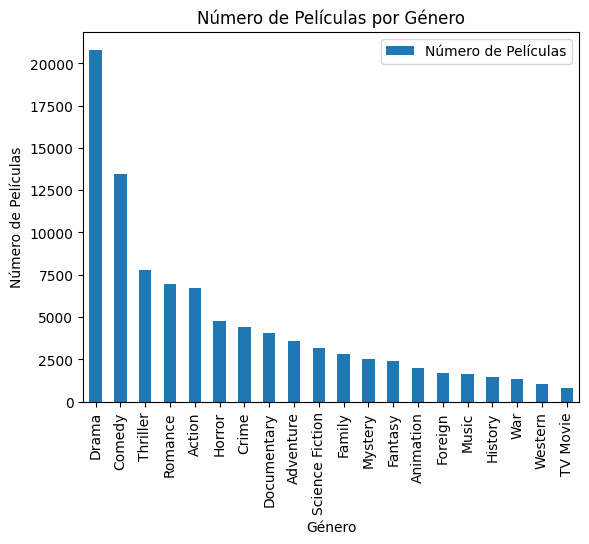

In [ ]:
# Se convierten las listas de géneros en una lista plana.
lista_generos = [genero for lista in complete_movies_df['genres'] for genero in lista]

# Se cuenta la frecuencia de cada género.
conteo_generos = Counter(lista_generos)

# Se convierte el conteo de géneros en un DataFrame.
conteo_df = pd.DataFrame.from_dict(conteo_generos, orient='index').reset_index()
conteo_df.columns = ['Genero', 'Número de Películas']

# Se ordena el DataFrame por frecuencia ascendente.
conteo_df = conteo_df.sort_values(by='Número de Películas', ascending=False)

# Se grafican los resultados.
conteo_df.plot(kind='bar', x='Genero', y='Número de Películas')
plt.title('Número de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.show()

####Los 100 Directores con Más Películas.

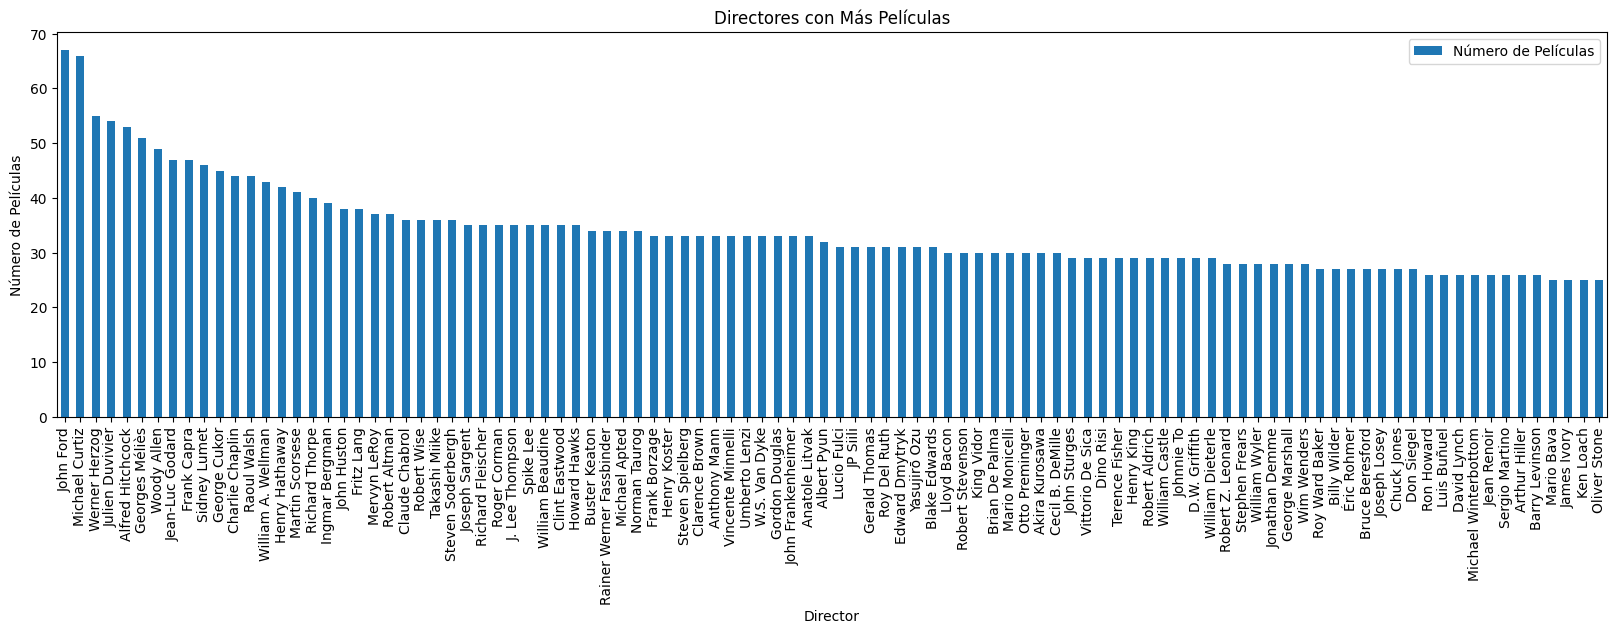

In [ ]:
# Se convierte cada lista de nombres de director en un solo string.
directores_lista = [' '.join(nombre) for nombre in complete_movies_df['crew'] if nombre]

# Se cuenta la frecuencia de cada director.
conteo_directores = Counter(directores_lista)

# Se convierte el conteo de directores en un DataFrame.
conteo_df = pd.DataFrame.from_dict(conteo_directores, orient='index').reset_index()
conteo_df.columns = ['Director', 'Número de Películas']

# Se ordena el DataFrame por frecuencia ascendente.
conteo_df = conteo_df.sort_values(by='Número de Películas', ascending=False)

# Se grafican los resultados.
conteo_df.head(100).plot(kind='bar', x='Director', y='Número de Películas', figsize=(20,5))
plt.title('Directores con Más Películas')
plt.xlabel('Director')
plt.ylabel('Número de Películas')
plt.show()

####Las 100 Compañías de Producción con Más Películas.

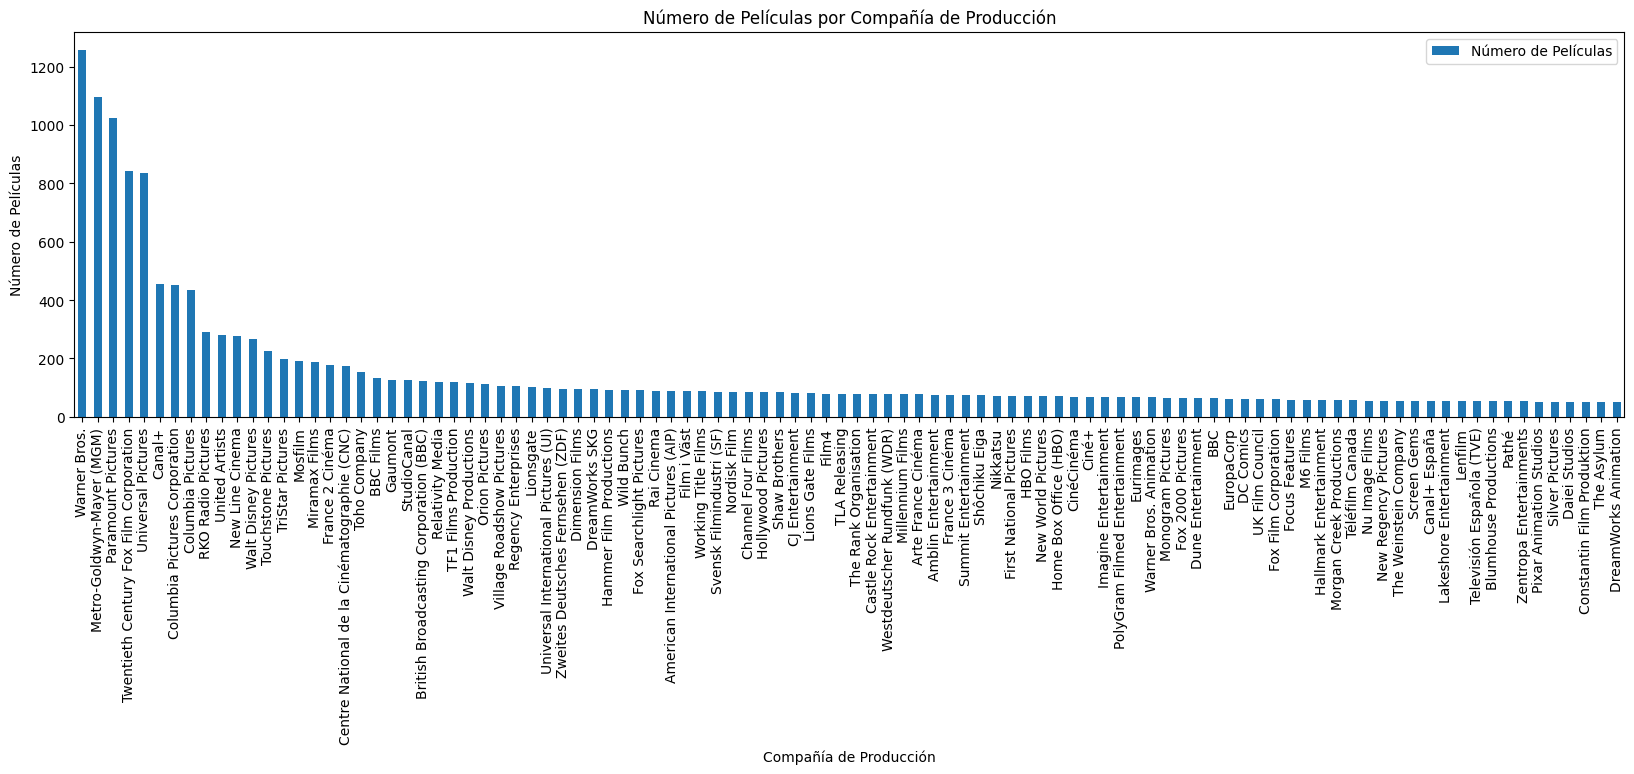

In [ ]:
# Se convierten las listas de compañías de producción en una lista plana.
lista_production_companies = [production_companie for lista in complete_movies_df['production_companies'] for production_companie in lista]

# Se cuenta la frecuencia de compañías de producción.
conteo_production_companies = Counter(lista_production_companies)

# Se convierte el conteo de compañías de producción en un DataFrame.
conteo_df = pd.DataFrame.from_dict(conteo_production_companies, orient='index').reset_index()
conteo_df.columns = ['Compañía de Producción', 'Número de Películas']

# Se ordena el DataFrame por frecuencia ascendente.
conteo_df = conteo_df.sort_values(by='Número de Películas', ascending=False)

# Se grafican los resultados.
conteo_df.head(100).plot(kind='bar', x='Compañía de Producción', y='Número de Películas', figsize=(20,5))
plt.title('Número de Películas por Compañía de Producción')
plt.xlabel('Compañía de Producción')
plt.ylabel('Número de Películas')
plt.show()

####Las 100 Actores o Personajes (Películas Animadas) con Más Películas.

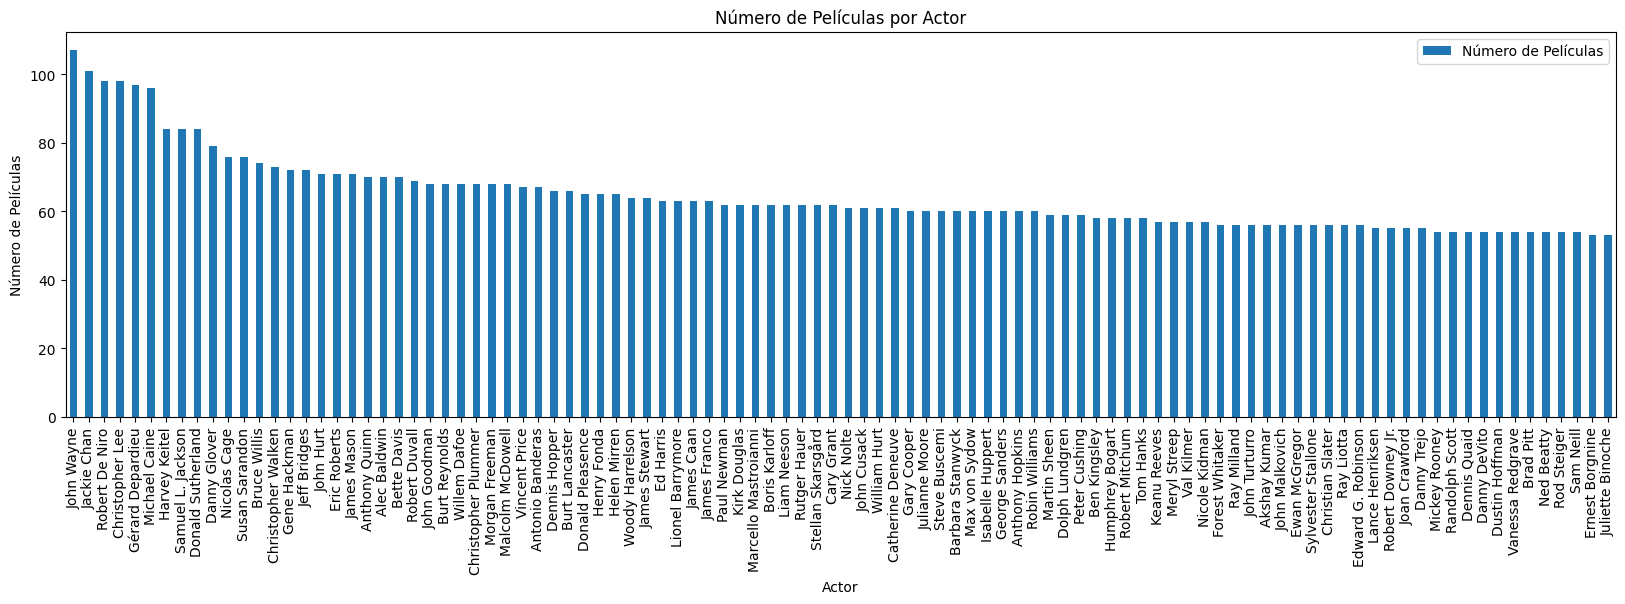

In [ ]:
# Se convierten las listas de acttores en una lista plana.
all_actors = [actor for lista in complete_movies_df['cast'] for actor in lista]

# Se cuenta la frecuencia de cada actor.
actor_counts = Counter(all_actors)

# Se convierte el conteo de actores en un DataFrame.
actor_counts_df = pd.DataFrame.from_dict(actor_counts, orient='index').reset_index()
actor_counts_df.columns = ['Actor', 'Número de Películas']

# Se ordena el DataFrame por frecuencia descendente.
actor_counts_df = actor_counts_df.sort_values(by='Número de Películas', ascending=False)

# Se grafican los resultados.
actor_counts_df.head(100).plot(kind='bar', x='Actor', y='Número de Películas', figsize=(20, 5))
plt.title('Número de Películas por Actor')
plt.xlabel('Actor')
plt.ylabel('Número de Películas')
plt.show()

###Sistema de Recomendación 1.

#### Algoritmo de recomendacion avanzado (Sugerencias por usuario)

Para el algoritmo de recomendacion avanzado, nuestro objetivo sera hacer recomendaciones basadas en el usuario, no en una pelicula en especifico. Utilizaremos un dataset mas grande de peliculas vs sus ratings por diferentes usuarios de MovieLens.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creamos tabla pivote de usuarios vs features (ranked movies)
# se debe de usar el Id de la pelicula, no el titulo en si
user_movie_rating = ratings_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
print(user_movie_rating.shape)
user_movie_rating.head()

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Estandarizamos los valores en el rango entre 0 y 1
user_movie_rating_normalized = scaler.fit_transform(user_movie_rating)

In [ ]:
# creating train and test sets
X_train, X_test = train_test_split(user_movie_rating_normalized, train_size=0.8)

In [ ]:
# Definir el número de características y la cantidad de nodos en cada capa,
# deben de coincidir con los features del usuario
#en este caso el num de peliculas
n_features = user_movie_rating_normalized.shape[1]
n_nodes_hl1 = 256
n_output_nodes = user_movie_rating_normalized.shape[1]

# Crear el modelo de Keras Sequential
model = Sequential()
model.add(Input(shape=(n_features,)))

# Añadir una capa densa
model.add(Dense(n_nodes_hl1, activation='sigmoid', kernel_initializer='random_normal'))

# Añadir un nodo constante a la salida de la capa oculta
model.add(Dense(n_output_nodes, kernel_initializer='random_normal'))

# Compilar el modelo con el optimizador y la función de pérdida
learn_rate = 0.0001
optimizer = Adam(learning_rate=learn_rate)

# Definir la función de pérdida
def meansq(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model.compile(optimizer=optimizer, loss=meansq)

# Mostrar el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2489600   
                                                                 
 dense_1 (Dense)             (None, 9724)              2499068   
                                                                 
Total params: 4988668 (19.03 MB)
Trainable params: 4988668 (19.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import History

# Define the number of epochs and batch size
hm_epochs = 50
batch_size = 64

# Initialize an instance of History to store training history
history = History()

# Train the model using model.fit
history = model.fit(
    X_train, X_train,
    epochs=hm_epochs,
    batch_size=batch_size,
    validation_data=(X_test, X_test),
    callbacks=[history]
)

Epoch 1/50
8/8 [==============================] - 2s 112ms/step - loss: 0.1495 - val_loss: 0.1165
Epoch 2/50
8/8 [==============================] - 1s 87ms/step - loss: 0.0981 - val_loss: 0.0776
Epoch 3/50
8/8 [==============================] - 1s 84ms/step - loss: 0.0661 - val_loss: 0.0538
Epoch 4/50
8/8 [==============================] - 1s 125ms/step - loss: 0.0466 - val_loss: 0.0394
Epoch 5/50
8/8 [==============================] - 1s 121ms/step - loss: 0.0347 - val_loss: 0.0306
Epoch 6/50
8/8 [==============================] - 1s 120ms/step - loss: 0.0274 - val_loss: 0.0251
Epoch 7/50
8/8 [==============================] - 1s 117ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 8/50
8/8 [==============================] - 1s 137ms/step - loss: 0.0197 - val_loss: 0.0193
Epoch 9/50
8/8 [==============================] - 1s 92ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 10/50
8/8 [==============================] - 1s 82ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 11/50
8/8 [======

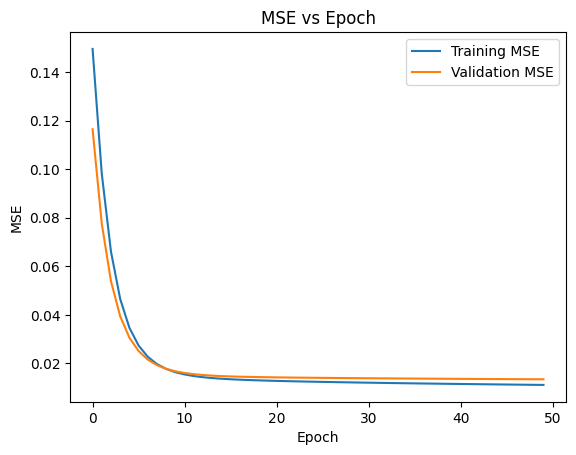

In [ ]:
# Plot MSE vs epoch using training history
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('MSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
def get_Recommendations_for_user(user_id):
  # Necesitamos convertir el numpy array X_test a dataframe
  X_test_df = pd.DataFrame(X_test)

  #Obtenemos los features de dicho usuario
  sample_user = np.array(X_test_df.iloc[user_id, :]).reshape(1, -1)
  # y realizamos prediccion
  sample_user_pred = model.predict(sample_user)

  # Obtener las 10 películas con las calificaciones más altas
  top_10_movie_indices = np.argsort(sample_user_pred[0])[-10:][::-1]
  top_10_movie_ratings = sample_user_pred[0][top_10_movie_indices]

  # Imprimir las 10 recomendaciones
  print("Top 10 movie recommendations for the sample user:")
  for idx, movie_id in enumerate(top_10_movie_indices):
      result = movies_catalogue_df.loc[movies_catalogue_df['movieId'] == movie_id]
      if not result.empty:
        movie_title = result.iloc[0]['title']
        print(f"title: {movie_title}, Predicted Rating: {top_10_movie_ratings[idx]}")
      else:
          print(f"No se encontró el titulo para el id: {movie_id}")

In [ ]:
#Intentar con diferentes user_ids para obtener las peliculas recomendadas
get_Recommendations_for_user(10)

1/1 [==============================] - 0s 88ms/step
Top 10 movie recommendations for the sample user:
title: Miracle on 34th Street (1994), Predicted Rating: 0.4767845869064331
title: Secret of Roan Inish, The (1994), Predicted Rating: 0.4446270167827606
title: Lost Weekend, The (1945), Predicted Rating: 0.3948463499546051
title: Poetic Justice (1993), Predicted Rating: 0.38240766525268555
title: Just Cause (1995), Predicted Rating: 0.34694910049438477
No se encontró el titulo para el id: 2224
title: Go Fish (1994), Predicted Rating: 0.3206760883331299
title: Piano, The (1993), Predicted Rating: 0.3180352449417114
No se encontró el titulo para el id: 398
title: Don Juan DeMarco (1995), Predicted Rating: 0.31153956055641174


###Sistema de Recomendación 2.

####Algoritmo Simple de Recomendación - Similitud de Coseno

####1. Creación de Colección Unificada de Características

In [ ]:
def collapse(list):
    collapsed_list = []
    for i in list:
        collapsed_list.append(i.replace(" ", ""))
    return collapsed_list

In [ ]:
complete_movies_df['keywords'] = complete_movies_df['keywords'].apply(collapse)
complete_movies_df['genres'] = complete_movies_df['genres'].apply(collapse)
complete_movies_df['overview'] = complete_movies_df['overview'].apply(collapse)
complete_movies_df['production_companies'] = complete_movies_df['production_companies'].apply(collapse)
complete_movies_df['cast'] = complete_movies_df['cast'].apply(collapse)
complete_movies_df['crew'] = complete_movies_df['crew'].apply(collapse)

complete_movies_df['collection'] = complete_movies_df['keywords'] + complete_movies_df['genres'] + complete_movies_df['overview'] + complete_movies_df['production_companies'] + complete_movies_df['cast'] + complete_movies_df['crew']

In [ ]:
new_data = complete_movies_df[['id','original_title', 'collection']].head(10000)
new_data['collection'] = new_data['collection'].apply(lambda x: " ".join(x))
new_data['collection'] = new_data['collection'].apply(lambda x: x.lower())

####2. Transformación de Texto

In [ ]:
ps = PorterStemmer()

In [ ]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
new_data['collection'] = new_data['collection'].apply(stem)

####3. Vectorización de Texto

In [ ]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
vector = cv.fit_transform(new_data['collection']).toarray()
vector.shape

(10000, 5000)

####4. Cálculo de Similitud - Similitud Coseno

In [ ]:
similarity = cosine_similarity(vector)

####5. Algoritmo de Recomendación

Recomendaciones en base a la película: Indiana Jones and the Last Crusade

Raiders of the Lost Ark
Indiana Jones and the Temple of Doom
Lara Croft: Tomb Raider
King Solomon's Mines
National Treasure


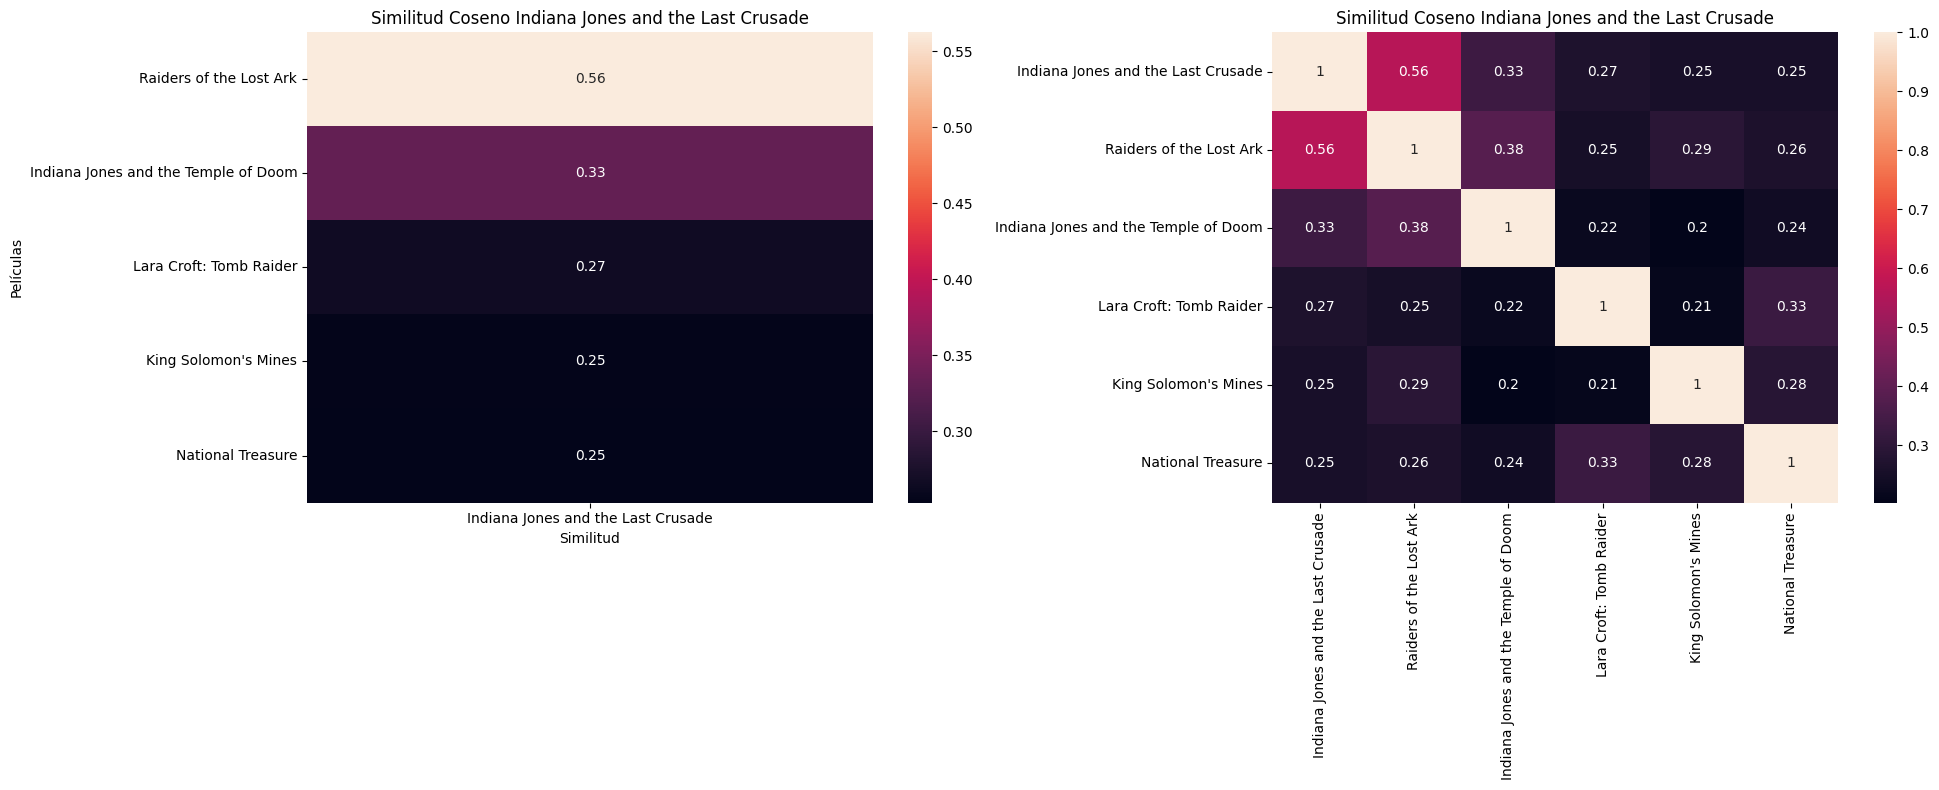

In [ ]:
def recommend(movie):
    index = new_data[new_data['original_title'] == movie].index[0]
    distances = similarity[index]
    most_similar_movies = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    print(f"Recomendaciones en base a la película: {movie}\n")
    for i in most_similar_movies:
        print(new_data.iloc[i[0]].original_title)

    # Crear los índices de las películas más similares
    most_similar_indices = [i[0] for i in most_similar_movies]

    # Crear y mostrar el heatmap de una sola columna
    most_similar_similarities_column = distances[most_similar_indices].reshape(-1, 1)

    # Crear y mostrar el heatmap completo
    all_similar_indices = [index] + most_similar_indices
    most_similar_similarities_full = similarity[all_similar_indices][:, all_similar_indices]

    plt.figure(figsize=(20, 8))

    # Subplot 1: Heatmap de una sola columna
    plt.subplot(1, 2, 1)
    sns.heatmap(most_similar_similarities_column, annot=True, xticklabels=[movie], yticklabels=new_data['original_title'].iloc[most_similar_indices])
    plt.title(f'Similitud Coseno {movie}')
    plt.xlabel('Similitud')
    plt.ylabel('Películas')

    # Subplot 2: Heatmap completo
    plt.subplot(1, 2, 2)
    sns.heatmap(most_similar_similarities_full, annot=True, xticklabels=new_data['original_title'].iloc[all_similar_indices], yticklabels=new_data['original_title'].iloc[all_similar_indices])
    plt.title(f'Similitud Coseno {movie}')

    plt.tight_layout()
    plt.show()

# Probar la función de recomendación
recommend('Indiana Jones and the Last Crusade')


In [ ]:
# Función para evaluar el desempeño del modelo
def evaluate_model(recommendations, relevant_items):
    N = len(recommendations)
    hits = sum([1 for item in recommendations if item in relevant_items])

    # Precisión en el Top-N
    precision_at_n = hits / N

    # Recall en el Top-N
    recall_at_n = hits / len(relevant_items)

    return precision_at_n, recall_at_n

In [ ]:

def recommend(movie, relevant_items):
    index = new_data[new_data['original_title'] == movie].index[0]
    distances = similarity[index]
    most_similar_movies = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    print(f"Recomendaciones en base a la película: {movie}\n")
    recommendations = []
    for i in most_similar_movies:
        recommendation = new_data.iloc[i[0]].original_title
        recommendations.append(recommendation)
        print(recommendation)

    # Evaluación del modelo
    precision, recall = evaluate_model(recommendations, relevant_items)
    print(f"\nEvaluación del modelo en base a {movie}:")
    print(f"Precisión en el Top-5: {precision:.2f}")
    print(f"Recall en el Top-5: {recall:.2f}")

    # Crear los índices de las películas más similares
    most_similar_indices = [i[0] for i in most_similar_movies]

    # Crear y mostrar el heatmap de una sola columna
    most_similar_similarities_column = distances[most_similar_indices].reshape(-1, 1)

    # Crear y mostrar el heatmap completo
    all_similar_indices = [index] + most_similar_indices
    most_similar_similarities_full = similarity[all_similar_indices][:, all_similar_indices]

    plt.figure(figsize=(20, 8))

    # Subplot 1: Heatmap de una sola columna
    plt.subplot(1, 2, 1)
    sns.heatmap(most_similar_similarities_column, annot=True, xticklabels=[movie], yticklabels=new_data['original_title'].iloc[most_similar_indices])
    plt.title(f'Similitud Coseno {movie}')
    plt.xlabel('Similitud')
    plt.ylabel('Películas')

    # Subplot 2: Heatmap completo
    plt.subplot(1, 2, 2)
    sns.heatmap(most_similar_similarities_full, annot=True, xticklabels=new_data['original_title'].iloc[all_similar_indices], yticklabels=new_data['original_title'].iloc[all_similar_indices])
    plt.title(f'Similitud Coseno {movie}')

    plt.tight_layout()
    plt.show()

Recomendaciones en base a la película: Indiana Jones and the Last Crusade

Raiders of the Lost Ark
Indiana Jones and the Temple of Doom
Lara Croft: Tomb Raider
King Solomon's Mines
National Treasure

Evaluación del modelo en base a Indiana Jones and the Last Crusade:
Precisión en el Top-5: 0.80
Recall en el Top-5: 0.80


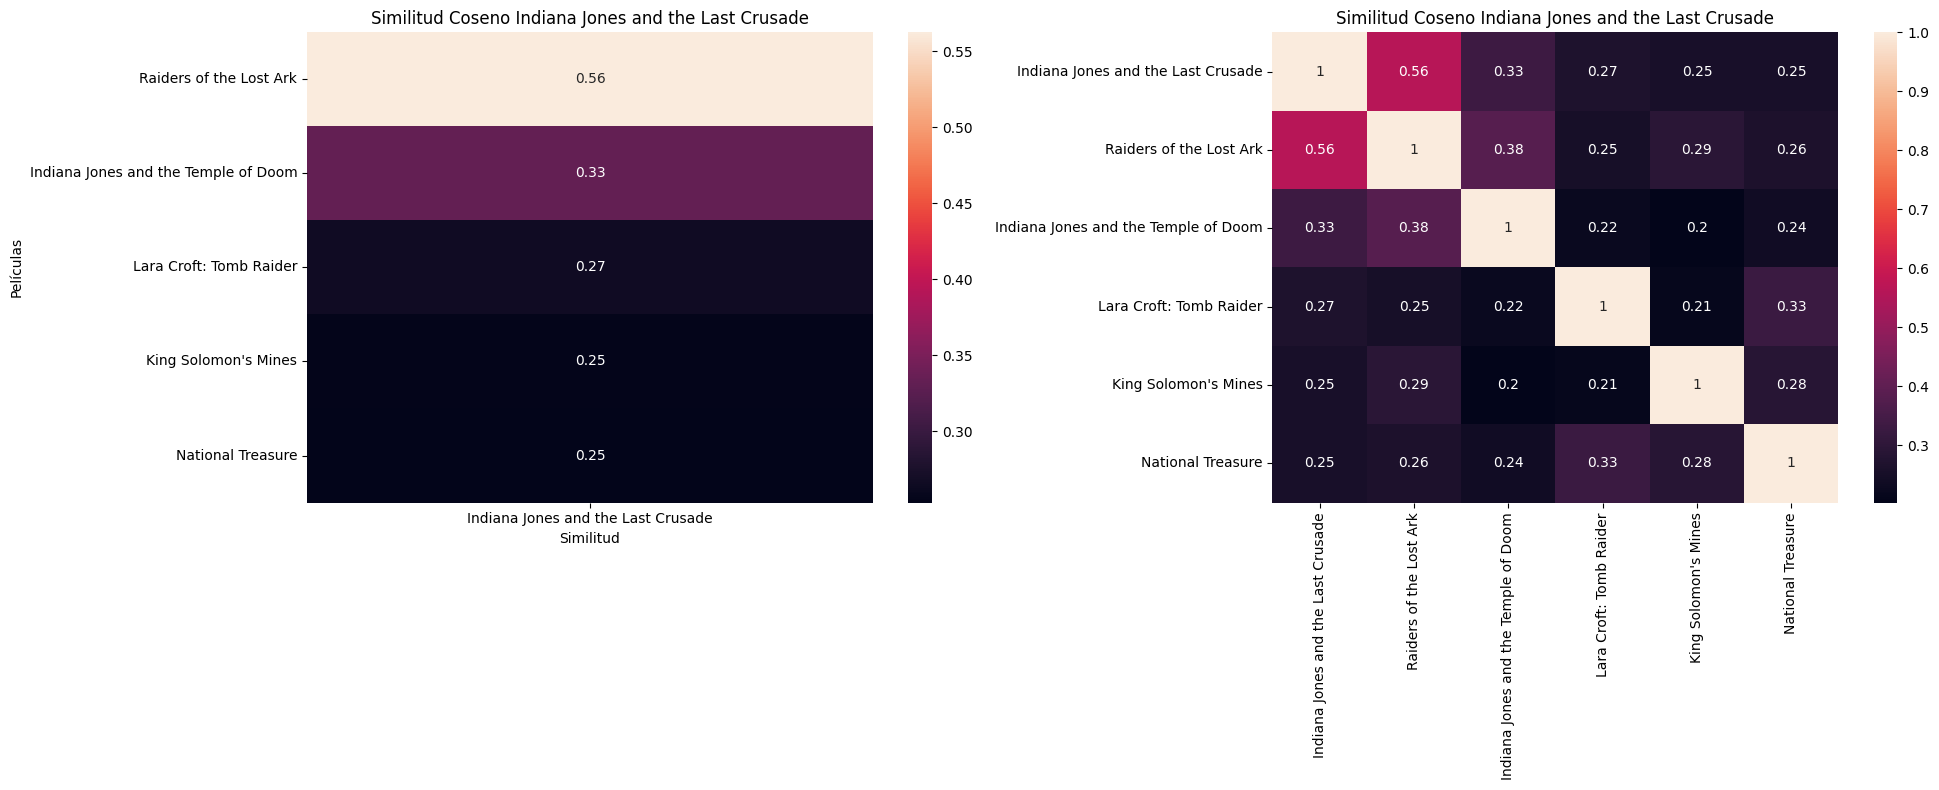

In [ ]:
# Items relevantes (debe ser ajustado según la película a evaluar).
relevant_items_example = [
    'Indiana Jones and the Temple of Doom',
    'Raiders of the Lost Ark',
    'National Treasure',
    'Lara Croft: Tomb Raider',
    'Pirates of the Caribbean: The Curse of the Black Pearl'
]

# Probar la función de recomendación
recommend('Indiana Jones and the Last Crusade', relevant_items_example)